## Clients Recommendations

Our client wishes to buy a house with the following specificatoins:
* Historic
* 4+ bathrooms or small house closeby with 4+ bathrooms
* Big lot for tennis, pool and golf
* No waterfront

Furthermore, our clients has an unlimited budget so we won't consider any compromises and will not handle any vague data.

First let's import all the important packages and the Dataframe and have a look at the specifications.


In [1]:
import pandas as pd
import missingno as msno
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from haversine import haversine, Unit

pd.set_option('display.max_columns', None)
df_all_housing_info = pd.read_csv('data/eda.csv')


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.v

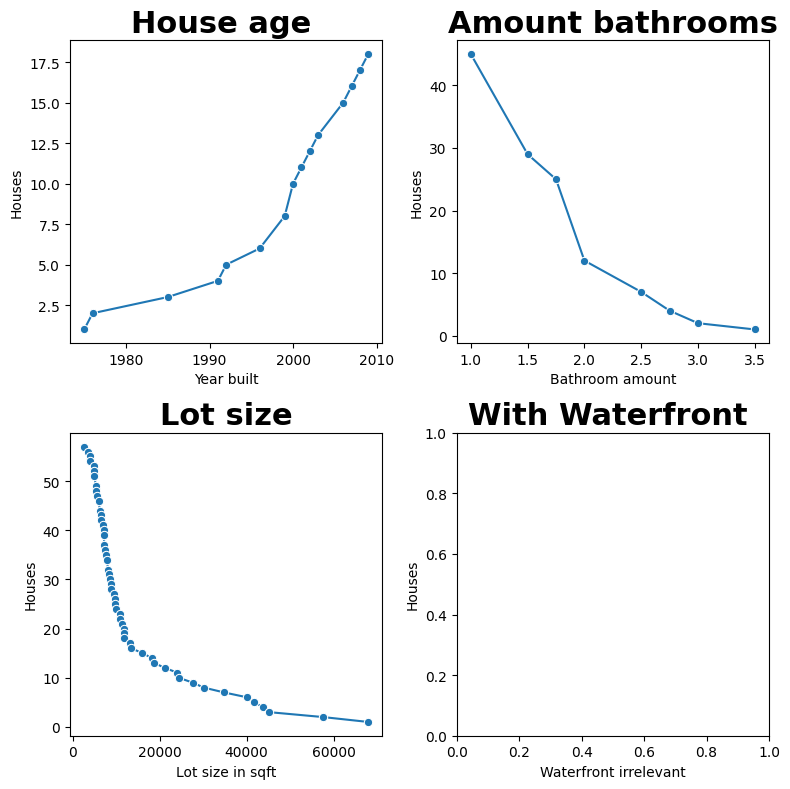

In [2]:
built_flex=df_all_housing_info.query('bathrooms>=4 and sqft_lot >150000 and waterfront == 0.0')
built_flex =built_flex['yr_built'].value_counts().sort_index().cumsum().reset_index()

bath_flex=df_all_housing_info.query('yr_built<1965 and sqft_lot >150000 and waterfront == 0.0')
bath_flex =bath_flex['bathrooms'].value_counts().sort_index(ascending=False).cumsum().reset_index()

lot_flex=df_all_housing_info.query('bathrooms>=4 and yr_built<1965 and waterfront == 0.0')
lot_flex =lot_flex['sqft_lot'].value_counts().sort_index(ascending=False).cumsum().reset_index()

water_flex=df_all_housing_info.query('bathrooms>=4 and sqft_lot >150000 and yr_built<1965')
water_flex =water_flex['waterfront'].value_counts().reset_index()

fig, axes = plt.subplots(2,2,figsize=(8,8))

plt.rc('axes', titlesize=22)  # Titelgröße
plt.rc('axes', labelsize=16)  # Achsentitelgröße
plt.rc('xtick', labelsize=12)  # X-Achsenwerte
plt.rc('ytick', labelsize=12)  # Y-Achsenwerte


sns.lineplot(data=built_flex, x='yr_built', y='count', marker='o',ax=axes[0,0])
axes[0,0].set_xlabel('Year built')
axes[0,0].set_ylabel('Houses')
axes[0,0].set_title('House age ', fontweight='bold')

sns.lineplot(data=bath_flex, x='bathrooms', y='count', marker='o',ax=axes[0,1])
axes[0,1].set_xlabel('Bathroom amount')
axes[0,1].set_ylabel('Houses')
axes[0,1].set_title('Amount bathrooms', fontweight='bold')


sns.lineplot(data=lot_flex, x='sqft_lot', y='count', marker='o',ax=axes[1,0])
axes[1,0].set_xlabel('Lot size in sqft')
axes[1,0].set_ylabel('Houses')
axes[1,0].set_title('Lot size', fontweight='bold')


sns.lineplot(data=water_flex, x='waterfront', y='count', marker='o',ax=axes[1,1])
axes[1,1].set_xlabel('Waterfront irrelevant')
axes[1,1].set_ylabel('Houses')
axes[1,1].set_title('With Waterfront ', fontweight='bold')



plt.tight_layout()
plt.savefig('data/perfect_house_options.png', dpi=600, bbox_inches='tight')
plt.show()


In [3]:
df_all_housing_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [4]:
df_all_housing_info.head(5)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


In [5]:
print(f"Bathroom val: {df_all_housing_info.bathrooms.unique()}\n\n",
      f"Waterfront val: {df_all_housing_info.waterfront.unique()}\n\n",
      f"Biggest lots:\n {df_all_housing_info.sqft_lot.sort_values().tail(5)}\n\n",
      f"Oldest houses: \n{df_all_housing_info.yr_built.sort_values().head(5)}",
      )

Bathroom val: [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]

 Waterfront val: [nan  0.  1.]

 Biggest lots:
 3945      982998.0
7762     1024068.0
7640     1074218.0
17305    1164794.0
1717     1651359.0
Name: sqft_lot, dtype: float64

 Oldest houses: 
115      1900
18765    1900
13988    1900
15283    1900
5367     1900
Name: yr_built, dtype: int64


It seems, that there are some NaN entries in the waterfront column. Lets get rid of these entries.

In [6]:
df_all_housing_info = df_all_housing_info.dropna(subset=['waterfront'])

Now let's adjust the Dataframe to the likings of our client. We need one with more than 4 bathrooms and the other room with less.
Through some online research a lot with so much specifications should be at least 150.000sqft big to not make any compromises. 

In [7]:
df_ex_bth =df_all_housing_info.query('bathrooms<=4 and sqft_lot >150000 and yr_built < 1965 and waterfront == 0.0')
df_all_specs = df_all_housing_info.query('bathrooms>3 and sqft_lot >150000 and yr_built < 1965 and waterfront == 0.0')
#df_all_specs = df_all_housing_info.query('bathrooms>=4 and sqft_lot >80000 and yr_built < 1980' )
df_all_specs

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
14674,621069057,4.0,3.5,2700.0,443440.0,1.5,0.0,0.0,3,8,2700.0,0.0,1948,19970.0,98042,47.333,-122.098,3210.0,298182.0,2015-03-23,569950.0


In [8]:
#List of the id's all Houses that don't have at least 4 bathrooms.
ex_bth_id_list = df_ex_bth.id.tolist()

#List of id's of all small houses that are candidates to complement the big houses
sm_house_list = []

#Dictionary that saves all small houses in a list of every big house in ex_bth_id_list
close_hs_dict = {f"{id}": [] for id in ex_bth_id_list}

#DF containing all houses with at least 4 bathrooms
df_4_baths= df_all_housing_info[df_all_housing_info.bathrooms >4]

#Loops through all big houses in df_ex_bth and saving all small houses that are close enough 
#in the dictionary and the list am_house_list
for i, row1 in df_ex_bth.iterrows():
    same_zip = df_4_baths[df_4_baths.zipcode ==row1.zipcode]
    for j,row2 in same_zip.iterrows():
        if 0<haversine((row1.lat, row1.long),(row2.lat,row2.long),unit=Unit.FEET)<5000 :
            close_hs_dict[f"{row1.id}"].append(row2.id)            
            sm_house_list.append(row2.id)
            
            print(haversine((row1.lat, row1.long),(row2.lat,row2.long)))


#Drop all keys in close_hs_dict with empty list as value and save it in a new dictionary
has_cl_hs_dict = {key:close_hs_dict[key]  for key in close_hs_dict if close_hs_dict[key]!=[]}


1.0368408967121279
1.3637284872075472
0.23310102352037473
0.6882413407001728
1.389904477622724


Let's create the dataframe that holds all the information needed to create a map.

In [9]:
#DF of the houses that have small house closeby
df_has_cl_hs = df_ex_bth[df_ex_bth.id.astype(str).isin(has_cl_hs_dict.keys())]

#DF of small houses that are candidates for the above DF
df_sm_house =df_all_housing_info[df_all_housing_info.id.astype(int).isin(sm_house_list)]

#Add column with number to identify the 3 different groups
df_has_cl_hs['group']=3
df_sm_house['group']=1
df_all_specs['group']=2

#Concatenate all 3 small DF in  big one.
combined_df = pd.concat([df_sm_house,df_has_cl_hs, df_all_specs])

/tmp/ipykernel_91861/798720657.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_has_cl_hs['group']=3
/tmp/ipykernel_91861/798720657.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sm_house['group']=1
/tmp/ipykernel_91861/798720657.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

Now we create an interactive map to display all possible Houses. The red markers display the houses which have all including 4+ bathrooms, The orange markers are the big houses with their respected smaller houses nearby marked in blue.

In [10]:
# Create map center as mean of the latitude and longitude
map_center = [combined_df['lat'].mean(), combined_df['long'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Define colours for the groups
group_colors = {
    1: 'blue',
    2: 'red',
    3: 'orange'
}

# Put markers on the map 
for _, row in combined_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"ID: {row['id']}, Year: {row['yr_built']} Bathrooms: {row['bathrooms']} Lot: {row['sqft_lot']}sqft  ",
        icon=folium.Icon(color=group_colors[row['group']])
    ).add_to(m)

# Safe and display map
#m.save("combined_map_all_specs.html")
m

In [29]:
# Create map center as mean of the latitude and longitude
df_zippy = df_all_housing_info.copy()
df_zippy = df_zippy[df_zippy['zipcode']==98039	]

map_center = [df_zippy['lat'].mean(), df_zippy['long'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Define colours for the groups
# group_colors = {
#     1: 'blue',
#     2: 'red',
#     3: 'orange'
# }

# Put markers on the map 
for _, row in df_zippy.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"ID: {row['id']}, Year: {row['yr_built']} Bathrooms: {row['bathrooms']} Lot: {row['sqft_lot']}sqft  ",
        icon=folium.Icon(color='red')
    ).add_to(m)

# Safe and display map
#m.save("combined_map_2.html")
m

In [20]:
df_zippy = df_all_housing_info.copy()
df_zippy = df_zippy[df_zippy['zipcode']==98122]

In [22]:
df_all_housing_info
df_zippy

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
64,1189001180,3.0,2.25,1660.0,6000.0,1.0,0.0,0.0,3,7,1110.0,550.0,1979,0.0,98122,47.6113,-122.297,1440.0,4080.0,2014-06-03,425000.0
175,7234600798,3.0,2.50,1120.0,1100.0,2.0,0.0,0.0,3,8,820.0,300.0,2008,0.0,98122,47.6106,-122.310,1590.0,1795.0,2015-02-10,425000.0
177,2254502445,3.0,1.00,1220.0,4800.0,1.0,0.0,0.0,3,6,1220.0,0.0,1901,NaN,98122,47.6101,-122.307,1200.0,4800.0,2014-05-30,385000.0
237,7228500560,4.0,1.00,1970.0,4740.0,1.5,0.0,0.0,3,7,1670.0,300.0,1904,20050.0,98122,47.6136,-122.303,1510.0,4740.0,2015-03-20,410000.0
282,7424700045,5.0,3.00,3830.0,8480.0,2.0,0.0,1.0,5,9,2630.0,1200.0,1905,19940.0,98122,47.6166,-122.287,3050.0,7556.0,2015-05-13,2050000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21310,6003000851,1.0,1.00,550.0,1279.0,2.0,0.0,0.0,3,7,550.0,0.0,2008,NaN,98122,47.6160,-122.314,1460.0,1385.0,2014-05-22,353000.0
21403,2254501095,2.0,2.25,1630.0,1686.0,2.0,0.0,0.0,3,10,1330.0,300.0,2014,0.0,98122,47.6113,-122.314,1570.0,2580.0,2014-11-13,729999.0
21437,2254502071,2.0,2.50,750.0,1430.0,2.0,0.0,0.0,3,8,750.0,0.0,2006,0.0,98122,47.6093,-122.310,1320.0,2790.0,2014-05-23,375000.0
21512,3416600750,3.0,2.50,1750.0,1381.0,3.0,0.0,0.0,3,8,1750.0,0.0,2008,NaN,98122,47.6021,-122.294,1940.0,4800.0,2015-02-17,585000.0
